In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
## Importing file
df=pd.read_csv("S:/ML/datasets/housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


### Exploratory data analysis

In [3]:
## Checking shape of data
df.shape

(489, 4)

In [4]:
## Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
## Checking data type
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [6]:
## Checking missing values
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

##### No missing values in dataset

In [7]:
##Checking Duplicate Values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
484    False
485    False
486    False
487    False
488    False
Length: 489, dtype: bool

In [8]:
df.duplicated().sum()

0

#### No dulicate values found in dataset

<AxesSubplot:>

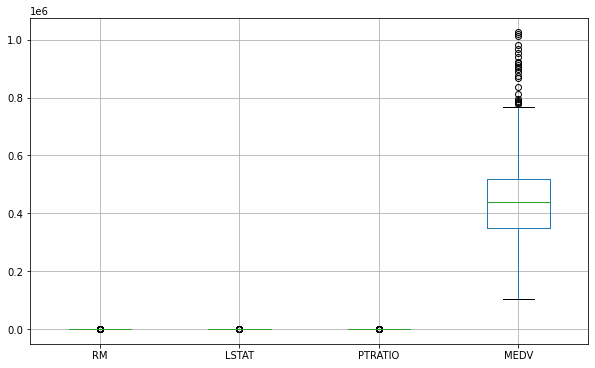

In [9]:
## Checking outliers using boxplot
df.boxplot(figsize=(10,6))

In [10]:
## Removing Outliers by IQR
#IQR -> Q3 -Q1
Q1=df.quantile(0.30)
Q3=df.quantile(0.70)
IQR=Q3-Q1
IQR

RM              0.5344
LSTAT           7.7700
PTRATIO         2.4000
MEDV       125160.0000
dtype: float64

In [11]:
# Q1-1.5*IQR to Q3+1.5*IQR
o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
o_df.shape

(391, 4)

<AxesSubplot:>

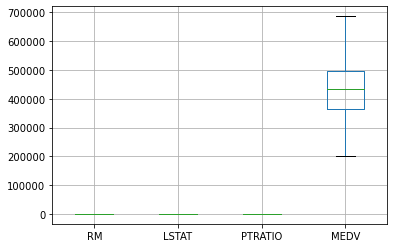

In [12]:
o_df.boxplot()

#### Founded outliers are removed from dataset as shown in above boxplot

#### Checking Co-relation

In [13]:
o_df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.477770,-0.123494,0.493536
LSTAT,-0.477770,1.000000,0.329015,-0.761524
PTRATIO,-0.123494,0.329015,1.000000,-0.441625
MEDV,0.493536,-0.761524,-0.441625,1.000000


<AxesSubplot:>

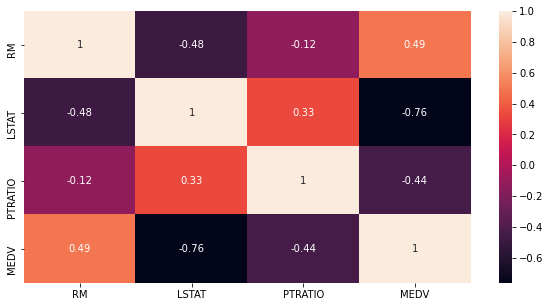

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(o_df.corr(),annot=True)

#### here we found the corelation between the dataset and we found that MEDV is dependent variable and all others are Independent Variables

In [15]:
o_df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

<Figure size 2160x576 with 0 Axes>

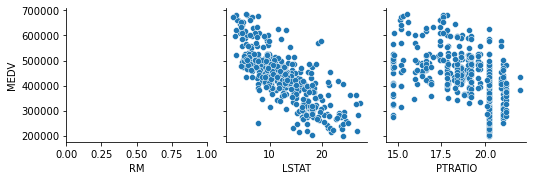

In [16]:
## Plotting pairplot to check relation
plt.figure(figsize=(30,8))
sns.pairplot(x_vars=['RM', 'LSTAT', 'PTRATIO'],y_vars=['MEDV'],data=o_df)

In [17]:
x=o_df.drop(columns='MEDV')
y=o_df['MEDV']

In [18]:
## Splitting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
xtrain.head()

,RM,LSTAT,PTRATIO
65,6.290,4.67,16.1
12,5.889,15.71,15.2
329,5.968,9.29,20.2
151,5.404,13.28,14.7
467,5.871,13.34,20.2


In [20]:
xtrain.shape

(312, 3)

In [21]:
xtest.shape

(79, 3)

In [22]:
ytrain.shape

(312,)

In [23]:
ytest.shape

(79,)

In [24]:
## Model Training
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [25]:
## Model Testing
ypred=model.predict(xtest)
ypred

array([499017.40680149, 341601.67322834, 453070.25089569, 438330.0002922 ,
       478235.32348587, 563321.23366444, 353900.60161545, 410047.12006502,
       390297.5289826 , 336355.57873415, 479920.35566976, 503549.08745497,
       329860.60854338, 329648.43418646, 413266.91570047, 401675.17527082,
       457748.80836809, 404403.06485623, 438134.575459  , 396658.93163851,
       271617.24719588, 495604.64427855, 336706.58945776, 522572.25213796,
       338759.05770497, 566904.72507306, 336003.72246901, 582120.99599685,
       535126.58504609, 522933.83551144, 375291.58522239, 304445.27658042,
       361878.28505871, 415877.02890232, 389511.42606073, 492584.39284455,
       370700.20592246, 391607.97706458, 520192.56183466, 504158.58501653,
       470909.93248403, 463215.35280397, 424630.42264939, 428049.66832112,
       268329.29709075, 553681.79675536, 503842.71208351, 567064.91484096,
       411259.81601264, 521720.2929169 , 340306.75461412, 402248.07031264,
       410926.72045472, 5

### Evaluation of model

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [27]:
mse=mean_squared_error(ytest,ypred) 
mse

3480593169.558208

In [28]:
rmse=np.sqrt(mse)
rmse

58996.552183650594

In [29]:
mae=mean_absolute_error(ytest,ypred)
mae

44004.61063406911

In [30]:
score=r2_score(ytest,ypred)
score

0.6737038738415728

### R2 score is 0.67

In [31]:
#slope
model.coef_

array([ 37349.12577343, -11784.08882165, -12249.39973963])

In [32]:
#y intercept
model.intercept_

578511.5434486618

### Same Model Analysis on Scaled Data

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
sc.fit(xtest)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [34]:
model=LinearRegression()
model.fit(sc_xtrain,ytrain)

LinearRegression()

In [35]:
ypred=model.predict(sc_xtest)

In [36]:
mse=mean_squared_error(ytest,ypred) 
mse

3480593169.5582075

In [37]:
rmse=np.sqrt(mse)
rmse

58996.552183650594

In [38]:
mae=mean_absolute_error(ytest,ypred)
mae

44004.61063406911

In [39]:
score=r2_score(ytest,ypred)
score

0.6737038738415729

### From the above result we found that on normal data and scaled data we get the same values of r2 score n all.so we can conclude that there is no more difference on both data and we can use both data for our model both are same good